# Data Exploration
Lorenzo Antolini, Simone Lu, Enrico Romano, Luca Schisano


In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
%matplotlib inline

In [2]:
# assign dataset names
list_of_names = ['01.geo','02.customers','03.sellers','04.order_status','05.order_items',
                '06.order_payments','07.product_reviews','08.products']
  
# create empty list
df = []
  
# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv (list_of_names [i] + ".csv", encoding="ISO-8859-1",delimiter = ";")
    df.append(temp_df)

In [3]:
df1 =df[0] 
df2 =df[1] 
df3 =df[2]  
df4 =df[3]  
df5 =df[4]
df6 =df[5]
df7 =df[6]
df8 =df[7]

#### Now, we start to merge the datasets

In [4]:
df_orders=pd.merge(df4,df2,on='customer_id')

In [5]:
merged=pd.merge(df_orders,df7,on='order_id')

In [6]:
df_final=pd.merge(merged,df8,on='product_id')

In [7]:
df_final = pd.merge(df_final, df5, on='order_id')


In [8]:
df_final

,order_id,customer_id,order_status,ts_order_purchase,ts_order_approved,ts_order_delivered_carrier,ts_order_delivered_customer,ts_order_estimated_delivery,customer_unique_id,customer_autonomous_community,...,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity,order_item_sequence_id,product_id_y,price,shipping_cost,seller_id,max_shipping_seller_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2018 10:56,02/10/2018 11:07,04/10/2018 19:55,10/10/2018 21:25,18/10/2018 00:00,7c396fd4830fd04220f754e42b4e5bff,Comunidad de Madrid,...,19.0,8.0,13.0,4.0,1,87285b34884572647811a353c7ac498a,29.99,8.72,3504c0cb71d7fa48d967e0e4c94d59d9,06/10/2018 11:07
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,15/08/2018 18:29,15/08/2018 20:05,17/08/2018 15:28,18/08/2018 14:44,28/08/2018 00:00,3a51803cc0d012c3b5dc8b7528cb05f7,Comunidad de Madrid,...,19.0,8.0,13.0,4.0,1,87285b34884572647811a353c7ac498a,29.99,7.78,3504c0cb71d7fa48d967e0e4c94d59d9,21/08/2018 20:05
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,02/08/2018 18:24,02/08/2018 18:43,04/08/2018 17:35,07/08/2018 18:30,15/08/2018 00:00,ef0996a1a279c26e7ecbd737be23d235,Comunidad de Madrid,...,19.0,8.0,13.0,4.0,1,87285b34884572647811a353c7ac498a,29.99,7.78,3504c0cb71d7fa48d967e0e4c94d59d9,08/08/2018 18:37
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,23/10/2018 23:26,25/10/2018 02:14,27/10/2018 16:48,07/11/2018 18:04,13/11/2018 00:00,e781fdcc107d13d865fc7698711cc572,Castilla y León,...,19.0,8.0,13.0,4.0,1,87285b34884572647811a353c7ac498a,29.99,14.10,3504c0cb71d7fa48d967e0e4c94d59d9,31/10/2018 02:14
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2019 20:41,26/07/2019 03:24,26/07/2019 14:31,07/08/2019 15:27,13/08/2019 00:00,af07308b275d755c9edb36a90c618231,País Vasco,...,19.0,13.0,19.0,1.0,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,289cdb325fb7e7f891c38608bf9e0962,30/07/2019 03:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120551,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,10/08/2018 21:21,10/08/2018 21:35,18/08/2018 16:42,23/08/2018 15:36,31/08/2018 00:00,fb9310710003399b031add3e55f34719,Comunidad de Madrid,...,28.0,23.0,23.0,1.0,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,218d46b86c1881d022bce9c68a7d4b15,17/08/2018 21:35
120552,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,10/08/2018 21:21,10/08/2018 21:35,18/08/2018 16:42,23/08/2018 15:36,31/08/2018 00:00,fb9310710003399b031add3e55f34719,Comunidad de Madrid,...,28.0,23.0,23.0,1.0,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,218d46b86c1881d022bce9c68a7d4b15,17/08/2018 21:35
120553,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,20/12/2018 09:52,20/12/2018 10:09,20/12/2018 20:25,26/01/2019 15:45,18/01/2019 00:00,a49e8e11e850592fe685ae3c64b40eca,Galicia,...,16.0,6.0,12.0,2.0,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,ce248b21cb2adc36282ede306b7660e5,27/12/2018 10:09
120554,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,09/03/2018 09:54,09/03/2018 09:54,10/03/2018 11:18,17/03/2018 15:08,28/03/2018 00:00,6359f309b166b0196dbf7ad2ac62bb5a,Andalucía,...,22.0,13.0,18.0,1.0,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,e24fc9fcd865784fb25705606fe3dfe7,15/03/2018 09:54


In [9]:
df_final.product_category_name = df_final.product_category_name.str.replace(' ', '')

In [10]:
def label_states(row):
    
    if row['product_category_name'] in ["book", "comics", "sportoutdoors", "musicinstruments", "agriculturesuppliers", "modelhobbybuilding", "painting",
"fabric", "film&photography", "camera&photo", "cdvinyl", "wallart", "event&partysupplies"]:
        return 'hobby'

    if row['product_category_name'] in ["food", "dietsportsnutrition"]:
        return 'food'
    
    if row['product_category_name'] in ["homeaccessories", "furniture", "officeproducts", "kitchen&dining", "seasonaldecor", "ceilingfans", "businessoffice",
"bedroomdecor", "sofa", "bakeware", "lawngarden", "mattresses&pillows","toolshomeimprovement"]:
        return 'forniture'
    
    if row['product_category_name'] in ["fragrance", "beauty&personalcare", "wellness&relaxation", "oralcare"]:
        return 'beauty'
    
    if row['product_category_name'] in ["automotive"]:
        return 'automotive'
    
    if row['product_category_name'] in ["computeraccessories", "cellphones", "television&video", "homeappliances", "hardware", "homelighting",
"lightbulbs", "videogameconsole", "homeaudio", "coffeemachines", "headphones", "monitors", "computerstablets", "dvd", "videogame"]:
        return 'eletronic' 
    
    if row['product_category_name'] in ["toysgames", "kids", "kidsfashion"]:
        return 'kids'
    
    if row['product_category_name'] in ["petsupplies", "petfood"]:
        return 'pet'
    
    if row['product_category_name'] in ["underwear", "fashion&shoes", "men'sfashion", "woman'sfashion"]:
        return 'clothes'
    
    if row['product_category_name'] in ["handbags&accessories", "luggage", "watches", "jewelry"]:
        return "accessories"
    
    if row['product_category_name'] in ["homeemergencykits", "firesafety", "healthhousehold", "medicalsupplies", "homesecuritysystems", "cleaningsupplies","safetyapparel"]:
        return 'safety' 
    else:
        return "other"
    
    
    
    
    
    
df_final['label'] = df_final.apply(lambda row: label_states(row), axis=1)

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120556 entries, 0 to 120555
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       120556 non-null  object 
 1   customer_id                    120556 non-null  object 
 2   order_status                   120556 non-null  object 
 3   ts_order_purchase              120556 non-null  object 
 4   ts_order_approved              120541 non-null  object 
 5   ts_order_delivered_carrier     119343 non-null  object 
 6   ts_order_delivered_customer    118146 non-null  object 
 7   ts_order_estimated_delivery    120556 non-null  object 
 8   customer_unique_id             120556 non-null  object 
 9   customer_autonomous_community  120556 non-null  object 
 10  customer_city                  120556 non-null  object 
 11  product_id_x                   120556 non-null  object 
 12  review_score                  

In [18]:
df_final["price"] = pd.to_numeric(df_final["price"], downcast="float")
df_final = df_final.dropna()

# Data Visualization

## Price distribution

Histogram. It divides the value range of continuous variables into discrete bins and shows how many values exist in each bin.

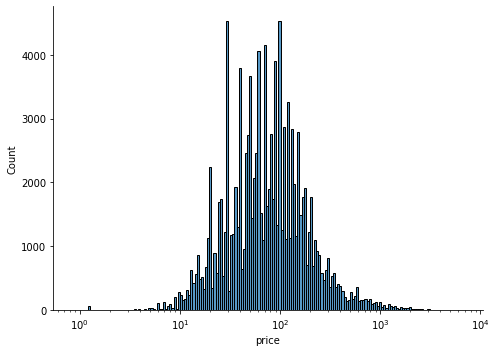

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(
  data=df_final,
  x="price",
  kind="hist",
  aspect=1.4,
  log_scale=10
)

Focusing the attention on the price distribution for category of product different points can be noticed:
    1) forniture goods are the most common product sold around the 80€ range.
    2) the most common goods in the 20€ - 50€ range are the kids related products.
    3) forniture goods represent also the main products sold in the ecommerce. 

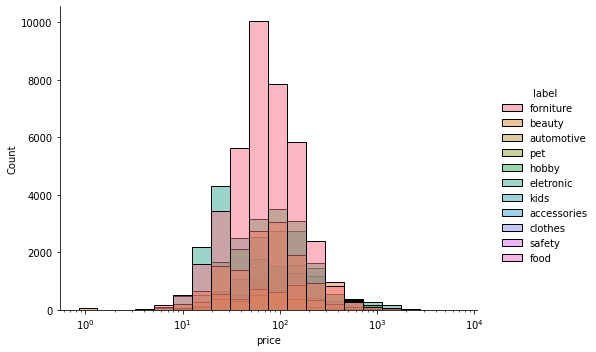

In [23]:
sns.displot(
  data=df_final,
  x="price",
  hue="label",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

Brief focus for each category price distribution. 
Double click on the image to zoom :)

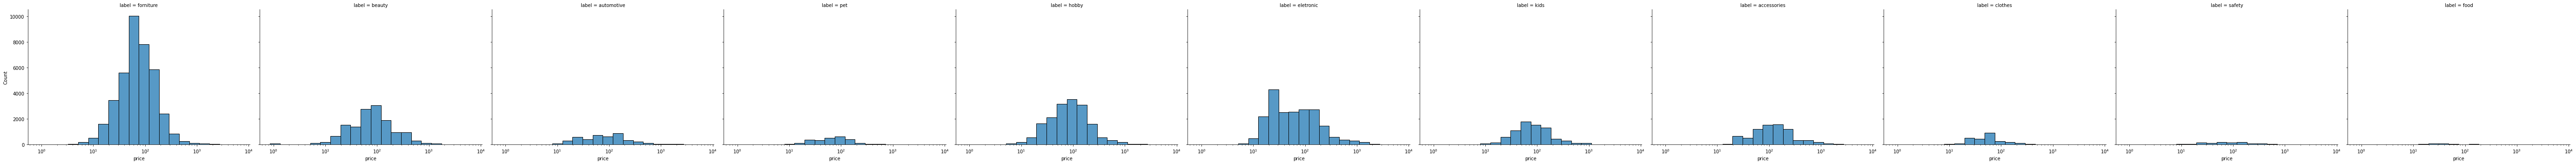

In [24]:
sns.displot(
  data=df_final,
  x="price",
  col="label",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=20
)

## KDE analisys

Kde plots can be used for visualizing the distribution of variables as well. They are quite similar to the histograms. However, a kde plot represents the distribution using a continuous probability density curve rather than with discrete bins.

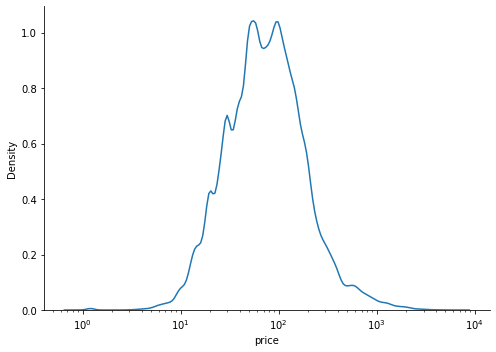

In [77]:
sns.displot(
  data=df_final,
  x="price",
  kind="kde",
  aspect=1.4,
  log_scale=10
)

The graph highlight the density distribution of the variable price in the dataset. As supposed before, the density distribution of the price variable tends towards values close to 100. 

Looking deeply on the distribution of the price by analysing the results focusing on the autonoumus comunity of the customer. The earlier analysis is strongly influenced by the fact that most orders come from the three most populous population centres in Spain (Madrid, Barcelona, Andalusia). In fact, if we compare the distributions for these three autonomous communities we notice that there is a very strong similarity to the total distribution curve. 

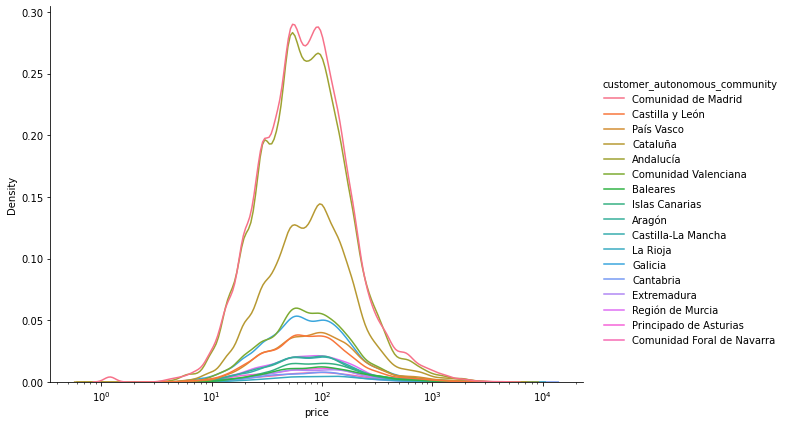

In [25]:
sns.displot(
  data=df_final,
  x="price",
  hue="customer_autonomous_community",
  kind="kde",
  height=6,
  aspect=1.4,
  log_scale=10
)